Neste exercício, iremos desenvolver uma ferramenta que possa auxiliar no diagnóstico da catarata. Utilizando uma **rede neural convolucional (CNN)**. Treinaremos um modelo capaz de classificar iamgens de olhos em **duas categorias**: com catarata e sem catarata.

[Download dataset de imagens de cataratas](https://cdn3.gnarususercontent.com.br/3773-tensorflow-keras-imagens-redes-convolucionais/Projeto/catarata.zip)

In [74]:
import pathlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras

### Exploração e visualização dos dados

In [75]:
data_dir = pathlib.Path('catarata')

Não temos as imagens muito bem balanceadas, porém talvez não seja um problema tão grave, pois a diferença não é tão grande da quantidade de imagens de uma classe para a outra.

Temos as imagens padronizadas em 416x416 pixels com 3 canais (deveremos passar para escala de cinza posteriormente).

In [76]:
images = []
for subfolder in data_dir.iterdir():
    imgs_paths = list(subfolder.glob('*.jpg')) # Adquire todos os paths de imagens jpg do diretório atual
    
    file_img = Image.open(imgs_paths[0]) # Pega a primeira imagem para verificar as dimensões
    file_img = np.array(file_img)
    
    images.append(file_img) # Adiciona na lista 2 exemplos, um immature e outro mature

    print(f'Classe "{subfolder.name}" contém {len(imgs_paths)} imagens.')
    print(f'Dimensão das imagens:', file_img.shape, '\n')

Classe "immature" contém 214 imagens.
Dimensão das imagens: (416, 416, 3) 

Classe "mature" contém 196 imagens.
Dimensão das imagens: (416, 416, 3) 



Visualizando uma imagem sem catarata (esquerda) e com catarata (direita)

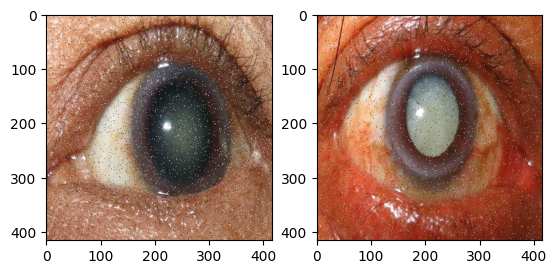

In [77]:
for i in range(0,2):
    plt.subplot(1,2, i +1)
    plt.imshow(images[i])

### Carregando os dados em lotes

In [78]:
BATCH_SIZE = 64
HEIGHT, WIDTH, _ = images[0].shape
SEED = 548

In [79]:
train = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=SEED,
    image_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [80]:
validation = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=SEED,
    image_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


In [ ]:
# TODO: Criar o modelo com a função de perda binary_crossentropy e função de ativação sigmoid (resultará valores de 0 a 1)